In [1]:
#import all the requirements
import pandas as pd
from sklearn import tree
from sklearn.tree import _tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import neighbors

In [2]:
#Load the data from the file. Make sure the file is in the same folder
df_census = pd.read_csv('census1994.csv')

#return the first 5 rows of the dataset
print("First 5 records")
df_census.head()

First 5 records


,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Remove all the data with '?' as the value
df = (df_census.where(df_census !=' ?').dropna())
print(len(df))

30162


In [4]:
#Split the data into X and target(Y)
data = df
target = data['class']
del data['class']
data = pd.get_dummies(data)

#Split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size = 0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((21113, 469), (9049, 469), (21113,), (9049,))

In [5]:
#Function the print the decision rules
def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)


In [6]:
accuracies = []  #List to store accuracies of all the classifiers of KNN

#Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=100, max_depth=5, min_impurity_split =0.3)
#Training the classifier
tree_clf.fit(X_train, Y_train)
#Test the classifier and get the accuracy
acc = 100*tree_clf.score(X_test, Y_test)
print("Accuracy for Decision tree using Gini: ",acc)
accuracies.append(acc)

#Predict test samples and create Confusion matrix
predicted_income = tree_clf.predict(X_test)
table = metrics.confusion_matrix(Y_test, predicted_income)
print("Confusion Matrix: \n",table)
#Create and print the Classification report
print(metrics.classification_report(Y_test, predicted_income))

C:\Users\deeps\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


Accuracy for Decision tree using Gini:  83.43463366117803
Confusion Matrix: 
 [[6444  322]
 [1177 1106]]
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      6766
        >50K       0.77      0.48      0.60      2283

    accuracy                           0.83      9049
   macro avg       0.81      0.72      0.75      9049
weighted avg       0.83      0.83      0.82      9049



In [7]:
#Print the decision rules
tree_to_code(tree_clf, list(Y_test))

  if  <=50K <= 0.5:
    return [[10507.   781.]]
  else:  # if  <=50K > 0.5
    if  <=50K <= 12.5:
      if  <=50K <= 5095.5:
        if  >50K <= 1846.0:
          if  <=50K <= 8.5:
            return [[913. 101.]]
          else:  # if  <=50K > 8.5
            return [[3622. 1678.]]
        else:  # if  >50K > 1846.0
          if  >50K <= 1989.5:
            return [[  7. 171.]]
          else:  # if  >50K > 1989.5
            return [[59. 15.]]
      else:  # if  <=50K > 5095.5
        return [[  8. 345.]]
    else:  # if  <=50K > 12.5
      if  <=50K <= 5095.5:
        if  >50K <= 1782.5:
          if  >50K <= 32.5:
            return [[108.  62.]]
          else:  # if  >50K > 32.5
            return [[ 653. 1373.]]
        else:  # if  >50K > 1782.5
          return [[ 10. 256.]]
      else:  # if  <=50K > 5095.5
        return [[  1. 443.]]


C:\Users\deeps\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


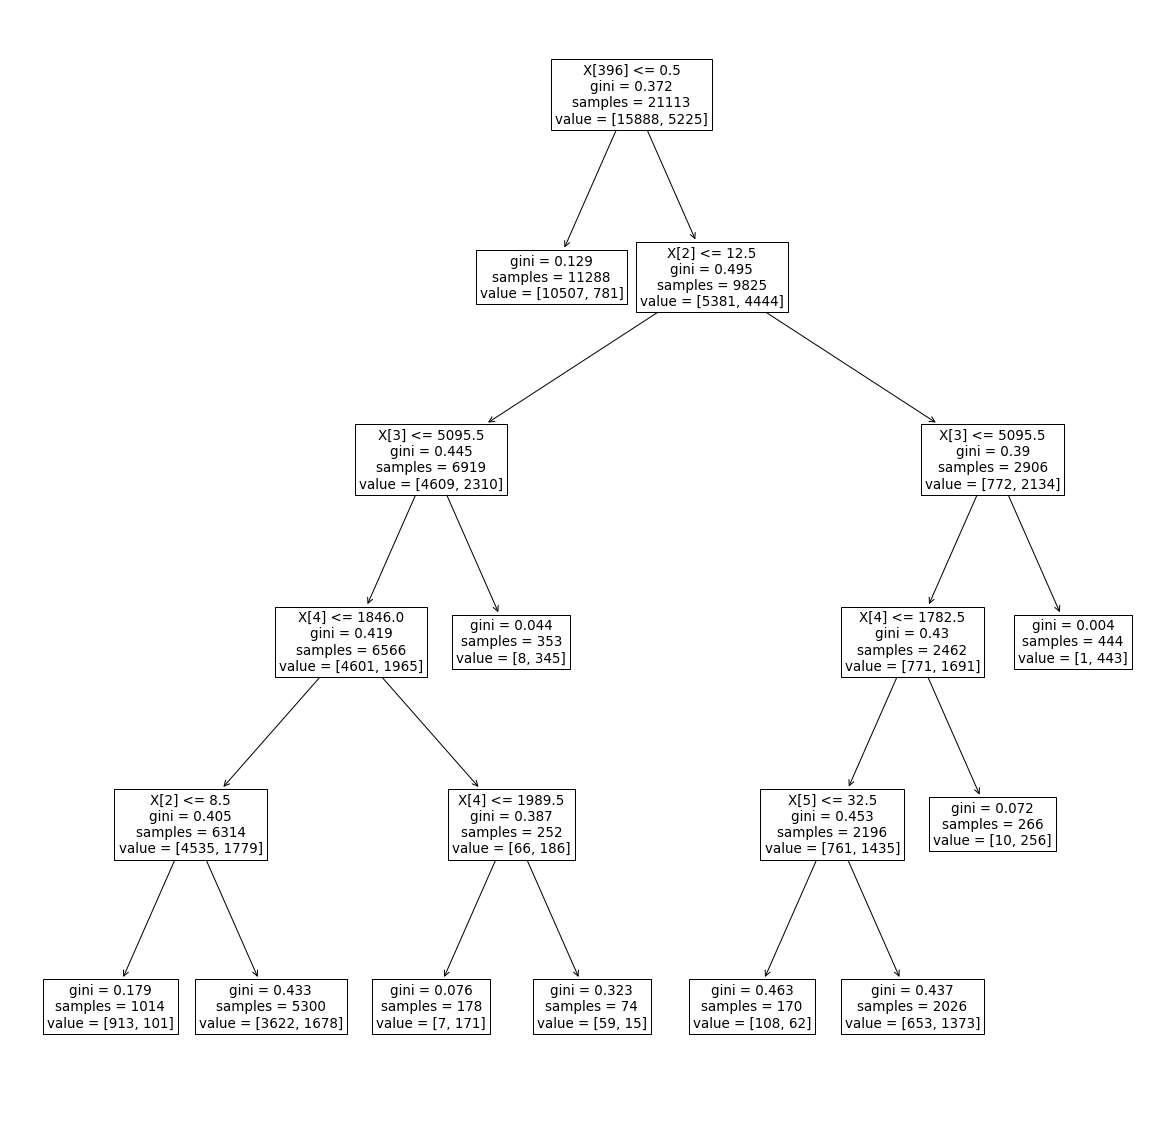

In [8]:
#Plot the Decision Tree
plt.figure(figsize=(20,20))
ply = tree.plot_tree(tree_clf.fit(X_train, Y_train))

In [9]:
#Decision Tree Classifier
tree_clf = DecisionTreeClassifier(criterion = 'entropy',random_state=100, max_depth=5,  min_impurity_split =0.3)
#Training the classifier
tree_clf.fit(X_train, Y_train)
#Test the classifier and get the accuracy
acc = 100*tree_clf.score(X_test, Y_test)
print("Accuracy for Decision tree using Gini: ",acc)
accuracies.append(acc)

#Predict test samples and create Confusion matrix
predicted_income = tree_clf.predict(X_test)
table = metrics.confusion_matrix(Y_test, predicted_income)
print("Confusion Matrix: \n",table)
#Create and print the Classification report
print(metrics.classification_report(Y_test, predicted_income))

C:\Users\deeps\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


Accuracy for Decision tree using Gini:  83.66670350314952
Confusion Matrix: 
 [[6444  322]
 [1156 1127]]
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.90      6766
        >50K       0.78      0.49      0.60      2283

    accuracy                           0.84      9049
   macro avg       0.81      0.72      0.75      9049
weighted avg       0.83      0.84      0.82      9049



In [10]:
#Print the decision rules
tree_to_code(tree_clf, list(Y_test))

  if  <=50K <= 0.5:
    if  <=50K <= 7073.5:
      return [[10502.   581.]]
    else:  # if  <=50K > 7073.5
      return [[  5. 200.]]
  else:  # if  <=50K > 0.5
    if  <=50K <= 12.5:
      if  <=50K <= 5095.5:
        if  <=50K <= 7.5:
          if  <=50K <= 37.5:
            return [[315.  14.]]
          else:  # if  <=50K > 37.5
            return [[555.  81.]]
        else:  # if  <=50K > 7.5
          if  <=50K <= 35.5:
            return [[1507.  410.]]
          else:  # if  <=50K > 35.5
            return [[2224. 1460.]]
      else:  # if  <=50K > 5095.5
        return [[  8. 345.]]
    else:  # if  <=50K > 12.5
      if  <=50K <= 5095.5:
        if  >50K <= 1782.5:
          if  >50K <= 32.5:
            return [[108.  62.]]
          else:  # if  >50K > 32.5
            return [[ 653. 1373.]]
        else:  # if  >50K > 1782.5
          return [[ 10. 256.]]
      else:  # if  <=50K > 5095.5
        return [[  1. 443.]]


C:\Users\deeps\AppData\Roaming\Python\Python37\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


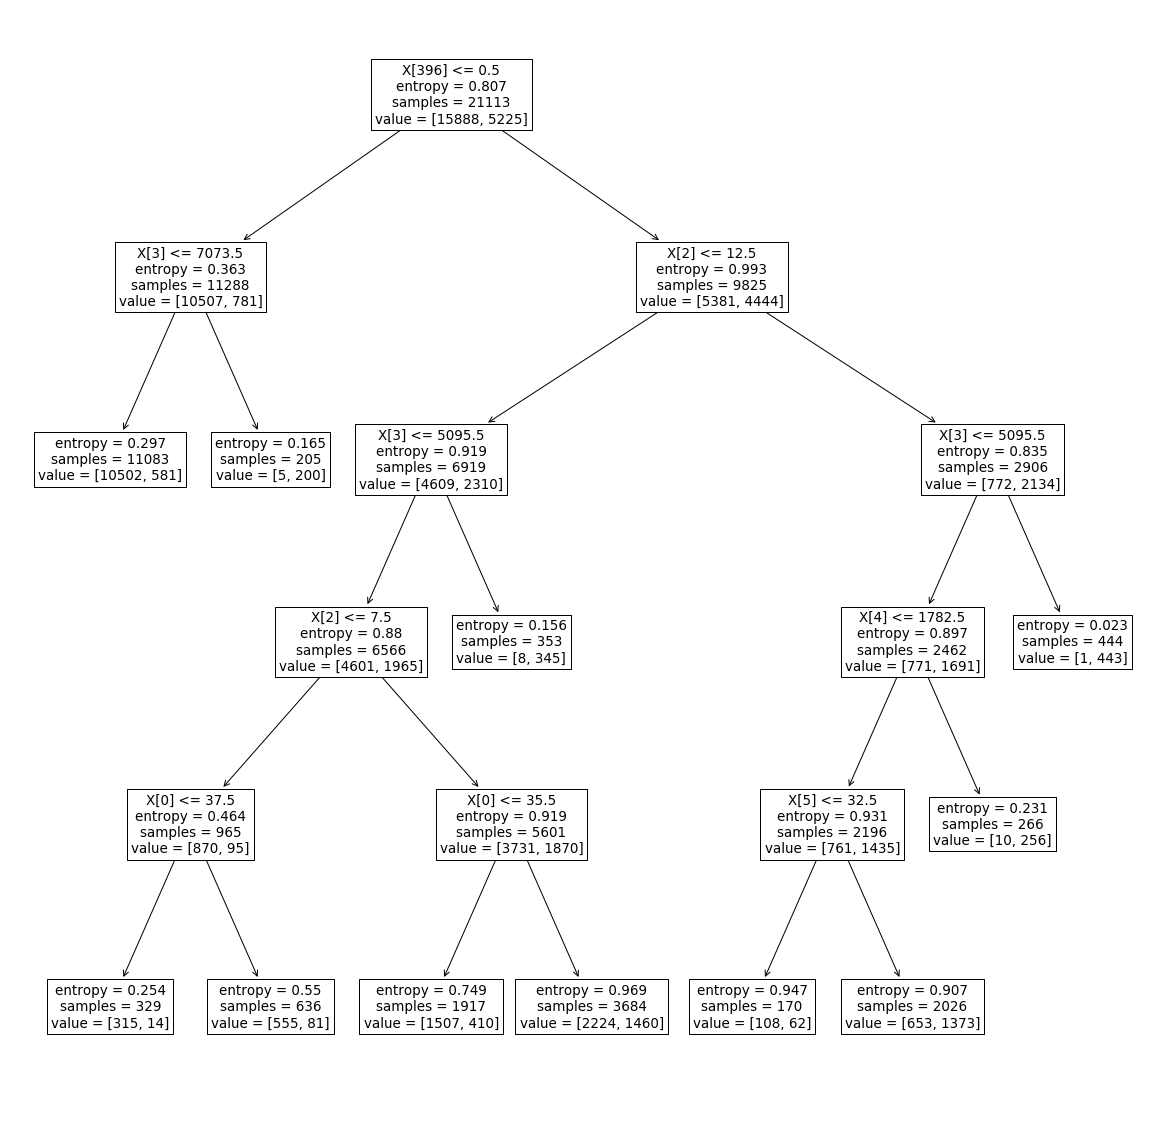

In [11]:
#Plot the Decision Tree
plt.figure(figsize=(20,20))
ply = tree.plot_tree(tree_clf.fit(X_train, Y_train))

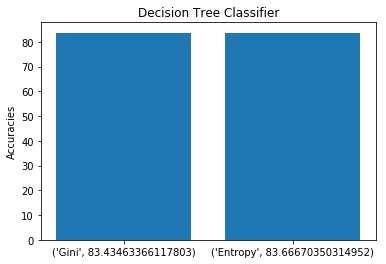

In [12]:
#Print the accuracies as a graph to compare between the classifiers
import numpy as np
objects = (('Gini',accuracies[0]),('Entropy',accuracies[1]))
y_pos = np.arange(len(objects))

plt.bar(y_pos, accuracies, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracies')
plt.title('Decision Tree Classifier')

plt.show()